In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [4]:
wine = pd.read_csv("wine.csv")

In [5]:
wine.keys()

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [6]:
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
wine.shape

(177, 14)

It is very wid but not very large 

Reduce the number of the features so my rows can be able to train 

As the dimensionality goes wider the variance goes smaller

PCA create new features that keep the patter of our original data
We can use these new features to do classification or prediction, but not to inference because they do not hold the original value, the values in PCA do not say anything about the data set.

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [9]:
wine.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
wine.isnull().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

In [11]:

column_names = ['Cultivar', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 
                'Magnesium', 'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols', 
                'Proanthocyanins', 'ColorIntensity', 'Hue', 'OD280/OD315', 'Proline']


wine = pd.read_csv('wine.csv', header = None, names = column_names)

Specify the column names

Read the CSV file with specified column names

In [12]:
wine.head()

,Cultivar,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
cultivar = wine[["Cultivar"]]

In [14]:
cultivar.head()

,Cultivar
0,1
1,1
2,1
3,1
4,1


In [15]:
wine_new = wine.drop(["Cultivar"], axis = 1)

In [16]:
X = wine_new           

y = cultivar      

In [17]:
y.value_counts()

Cultivar
2           71
1           59
3           48
dtype: int64

In [18]:
X

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [19]:
from sklearn.preprocessing import StandardScaler

We import this to standardise all the values. As the values have different scales, it is an important step to do PCA to standardise them. Because we are trying to create a new vector space. We have 13 features (columns) so we have 13 dimensions. 

In [20]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

This formula uses the standard deviation that is equal to 1 (m1?) and mean is equal to 0
It is possible to use min and max scaler as well, as it follows: from sklearn.preprocessing import MinMaxScaler This will convert all the values in the range between 0 to 1.

I did not understand this part, in the video he says that to finish the scaling we need to transform operation in the dataset

We transformed the data in an array.
This was based on the standard deviation equal to 1 and mean equal to 0
LEARN THE WHAT AN ARRAY IS

In [21]:
from sklearn.decomposition import PCA

PCA is a technique that is basically used for dimensionality reduction

In [22]:
pca = PCA()
pca.fit(X_scaled)

PCA()

1st attribute n_components = it is the number of components that you want to reduce to. So all the 13 dimensions that we have in this dataset will be reduced to 2. But why 2? How can I choose this number? In the CA we have hundredes of features. We can use 0.95: get me 95% 0f variance, 95% of information in terms of features
whiten : bool, default=False When True (False by default) the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
Whitening will remove some information from the transformed signal
(the relative variance scales of the components) but can sometime
improve the predictive accuracy of the downstream estimators by
making their data respect some hard-wired assumptions.

In [23]:
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)

var

array([36.2, 55.4, 66.5, 73.6, 80.2, 85.1, 89.3, 92. , 94.2, 96.1, 97.8,
       99.1, 99.9])

In [24]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

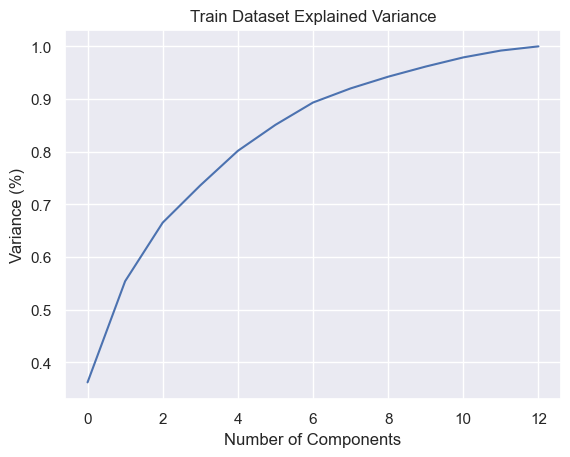

In [25]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Train Dataset Explained Variance")
plt.show()

In [26]:
computed_covmat = pca.get_covariance()

print("comvat from PCA:")

print("{}".format(computed_covmat))

comvat from PCA:
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.2

<Axes: >

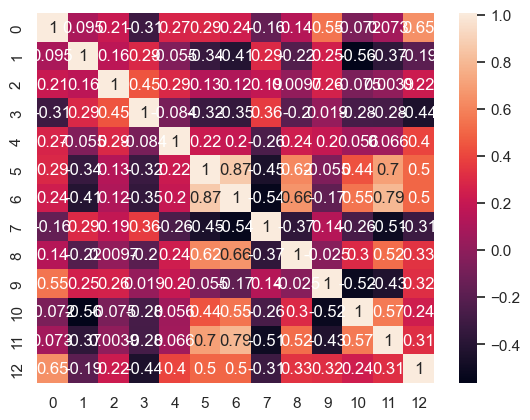

In [27]:
sns.heatmap(computed_covmat, annot = True)

variance among the variables
6 and 5 big variance (0.87)
11 and 5 (0.7)
11 and 6 (0.79)
4 and 3 (0.84)

with annot = True : shows the values in each square otherwise do not show

HOW TO MAKE IT BIGGER?

In [28]:
pca = PCA(n_components = 8)

wine_pca = pca.fit_transform(X_scaled)

In [29]:
wine_pca = pd.DataFrame(wine_pca, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])

wine_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700


In [30]:
wine_concat = pd.concat([wine_pca, y[["Cultivar"]]], axis = 1)

wine_concat.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Cultivar
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,1


fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PCA1", fontsize = 10)
ax.set_ylabel("PCA2", fontsize = 10)
ax.set_title("2 PCA components", fontsize = 15)
targets = ["1", "2", "3"]
colors = ["r", "g", "b"]
for target, color in zip(targets, color):
    ind = wine_concat["Cultivar"] == target
    ax.scatter(wine_concat.loc[ind, "PCA1"], wine_concat.loc[ind, "PCA2"], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [32]:
from sklearn.model_selection import train_test_split 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

In [34]:
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (178, 13) (178, 1)
Number of rows and columns after splitting dataset:  (142, 13) (36, 13) (142, 1) (36, 1)


In [35]:
X = wine_pca[["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"]]
y = [["Cultivar"]]

In [36]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

print('\nAccuracy: {0: .2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy:  0.92


https://www.youtube.com/watch?v=biOSgUjGB_o
    
This video helped me the most, now I have to go through everything again and try to explain all the steps
Also I need to study how to plot somthing with more than 2 PCA, in this case the number of PCAs is 8 and it is too much to plot a graph.

I want to try with the PCA(0.95), with 95% of information and variance

And I need to find the best model to use in this case.

In [38]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Call fit() method for training the dataset
nvclassifier.fit(X_train, y_train)

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [39]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

[1 3 2 2 2 1 2 1 2 1 2 2 1 1 1 2 1 1 2 2 3 3 2 3 2 3 3 2 1 2 1 2 1 2 1 1]


In [40]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test, y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10, :]


#the 1st value is the actual values and the 2nd is the predicted 

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 36

tomorrow I will finish

I am trying to understand github

# THIS IS ANOTHER METHOD 

In [41]:
from sklearn.preprocessing import StandardScaler

We import this to standardise all the values. As the values have different scales, it is an important step to do PCA to standardise them. Because we are trying to create a new vector space. We have 13 features (columns) so we have 13 dimensions. 

In [42]:
scaler = StandardScaler()

scaler.fit(wine)

StandardScaler()

This formula uses the standard deviation that is equal to 1 (m1?) and mean is equal to 0

It is possible to use min and max scaler as well, as it follows:
from sklearn.preprocessing import MinMaxScaler
This will convert all the values in the range between 0 to 1. 

In [43]:
scaled_data = scaler.transform(wine)

I did not understand this part, in the video he says that to finish the scaling we need to transform operation in the dataset

In [44]:
scaled_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

We transformed the data in an array.

This was based on the standard deviation equal to 1 and mean equal to 0

LEARN THE WHAT AN ARRAY IS



In [45]:
from sklearn.decomposition import PCA

PCA is a technique that is basically used for dimensionality reduction 

In [46]:
pca = PCA(n_components = 2)

1st attribute 
n_components = it is the number of components that you want to reduce to. So all the 13 dimensions that we have in this dataset will be reduced to 2. But why 2? How can I choose this number? In the CA we have hundredes of features.
We can use 0.95: get me 95% 0f variance, 95% of information in terms of features 


whiten : bool, default=False
    When True (False by default) the `components_` vectors are multiplied
    by the square root of n_samples and then divided by the singular values
    to ensure uncorrelated outputs with unit component-wise variances.

    Whitening will remove some information from the transformed signal
    (the relative variance scales of the components) but can sometime
    improve the predictive accuracy of the downstream estimators by
    making their data respect some hard-wired assumptions.

In [47]:
pca.fit(scaled_data)

PCA(n_components=2)

In [48]:
wine_pca = pca.transform(scaled_data)

I did not understand this. 
Transform using the pca object

In [49]:
scaled_data.shape

(178, 14)

this is the shape of my dataset withou PCA, the original one with all the dimensions. 

In [50]:
wine_pca.shape

(178, 2)

After applying the PCA we reduced the dataset to 2 dimensions. The question here is: why two? How do I decide? 

(-4.886652041544508, 4.905026354835528, -3.888497447660541, 4.238397943333135)

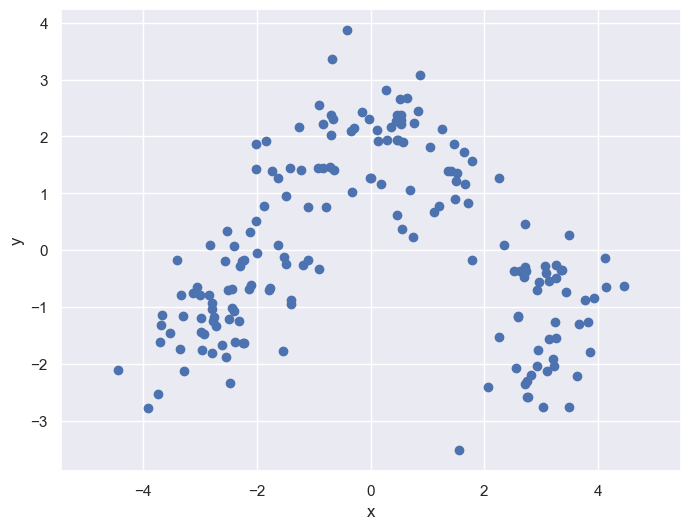

In [51]:
plt.figure(figsize = (8, 6))
plt.scatter(wine_pca[:, 0], wine_pca[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")

# IDEAS AND RESOURCES 

covarianceMatrix HOW TO DO THIS????

and then the eugen vectors

in this video https://www.youtube.com/watch?v=grFhO2Ix0Aw

scaled_data = preprocessing.scale(wine.T)

StandardScaler().fit_transform(data.T)

another way to transpose 

pca = PCA()

pca.fit(scaled_data)

pca_data = pca.transform(scaled_data)

ideas from this youtube video https://youtu.be/Lsue2gEM9D0?si=ucvv5fCWk_oyYT-L

maybe this video will be more helpful

https://www.youtube.com/watch?v=FgakZw6K1QQ

there are more

https://www.youtube.com/watch?v=fkf4IBRSeEc - THIS IS THEORY

https://www.youtube.com/watch?v=_UVHneBUBW0


more videos

https://www.youtube.com/watch?v=grFhO2Ix0Aw - USING THE COVARIANCE MATRIX


THIS IS GONNA HELP
https://www.youtube.com/watch?v=QdBy02ExhGI

https://www.youtube.com/watch?v=8klqIM9UvAc


VIDEOS THAT HELPED

1ST https://www.youtube.com/watch?v=QdBy02ExhGI


2ND https://www.youtube.com/watch?v=8klqIM9UvAc

sns.pairplot(data = wine)

now we are going to analyse all the variables against each one to check if they have any relationship

correlation is not causation , correlation does not mean causation

from sklearn.decomposition import PCA 

pca = PCA(n_components = 14)

pca.fit(wine)

PCA(copy = True, n_components = 14, whiten = False)

pca.components_

pca.explained_variance_